### Mercedes Benz Course End Project (By Medha Sharma)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts

!pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#Loading dataset
trainset = pd.read_csv('train.csv')
testset= pd.read_csv('test.csv')

In [3]:
trainset.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testset.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
#Printing some insights:
desc=trainset['y'].describe()
print('The minimum time spent by the car in testing', desc[3],'s')
print('The 25 percent of the cars less than %.4f s on testing'%desc[4])
print('The 50 percent of the cars less than %.4f s on testing'%desc[5])
print('The 75 percent of the cars less than %.4f s on testing'%desc[6])

The minimum time spent by the car in testing 72.11 s
The 25 percent of the cars less than 90.8200 s on testing
The 50 percent of the cars less than 99.1500 s on testing
The 75 percent of the cars less than 109.0100 s on testing


"Checking For Missing values in Train and Test Dataset"

In [7]:
#Checking for missing values

def missing_values(df):
    if df.isnull().any().any():
        print('There are missing values in the data' )
    else:
        print('There are no missing values in the data')
print("Checking missing value in train_df")
missing_values(trainset)
print("Checking missing value in test_df")
missing_values(testset)


Checking missing value in train_df
There are no missing values in the data
Checking missing value in test_df
There are no missing values in the data


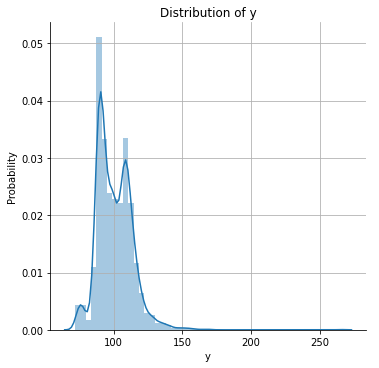

In [8]:
#Probability Density Function

sns.FacetGrid(trainset,height=5).map(sns.distplot,'y').add_legend()
plt.ylabel('Probability')
plt.title("Distribution of y")
plt.grid()
plt.show()


"Removing columns with zero variance"

In [9]:
#Function for deleting columns with zero variance
print(trainset.shape , testset.shape)
def drop_constant_df(df1,df2):
    columns=df1.columns.values
    for col in columns:
        if df1[col].nunique(dropna=False)==1:
            del df1[col]
            del df2[col]
    return df1, df2

drop_constant_df(trainset,testset)
print(trainset.shape , testset.shape)


(4209, 378) (4209, 377)
(4209, 366) (4209, 365)


"Checking Unique values in categorical columns

In [10]:

def unique_values(df):
    for col in df.columns:
        if df[col].dtype=='object':
            print(col)
            print(df[col].unique())
            
print("Checking unique values in train_df")
unique_values(trainset)
print("Checking unique values in test_df")
unique_values(testset)

Checking unique values in train_df
X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4
['d' 'b' 'c' 'a']
X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
Checking unique values in test_df
X0
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h'

In [11]:
#We saw that columns X0, X2 and X5 have different categorical values, we need to check them
diff= ['X0','X2','X5']
for col in diff:
    a= set(sorted(list(trainset[col].unique())))
    b= set(sorted(list(testset[col].unique())))
    print("Categories of {} present in train but absent in test:{}".format(col,a-b))
    print("Categories of {} present in test but absent in train:{}\n".format(col,b-a))


Categories of X0 present in train but absent in test:{'ab', 'ac', 'q', 'aa'}
Categories of X0 present in test but absent in train:{'bb', 'ae', 'ag', 'an', 'p', 'av'}

Categories of X2 present in train but absent in test:{'c', 'aa', 'o', 'l', 'ar'}
Categories of X2 present in test but absent in train:{'w', 'ab', 'u', 'aj', 'ax', 'ad'}

Categories of X5 present in train but absent in test:{'u'}
Categories of X5 present in test but absent in train:{'a', 't', 'z', 'b'}



In [12]:

train_binary= trainset.copy() #creating a copy of the dataframe
train_binary= train_binary.drop(['y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],axis=1)
test_binary= testset.copy() #creating a copy of the dataframe
test_binary= test_binary.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],axis=1)
print(train_binary.shape, test_binary.shape)

(4209, 357) (4209, 357)


In [13]:
#setting Variance threshold to remove low variance features

def remove_low_var_col(df1,df2):
    low_var_cols=[]
    for i in train_binary.columns:
        if train_binary[i].var()<0.15: #Threshold value is experimental
            low_var_cols.append(i)
    print("Number of columns having very less variance are:\n",len(low_var_cols))
    print("Columns are:\n",low_var_cols)
    return low_var_cols

low_var_cols=remove_low_var_col(train_binary,test_binary)


Number of columns having very less variance are:
 283
Columns are:
 ['X10', 'X12', 'X13', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X28', 'X29', 'X30', 'X32', 'X33', 'X34', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X47', 'X48', 'X49', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59', 'X60', 'X61', 'X62', 'X63', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X82', 'X83', 'X84', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X97', 'X98', 'X99', 'X101', 'X102', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X117', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X128', 'X129', 'X130', 'X131', 'X133', 'X134', 'X135', 'X136', 'X138', 'X139', 'X140', 'X141', 'X143', 'X145', 'X146', 'X147', 'X148', 'X151', 'X152', 'X153', 'X155', 'X159', 'X160', 'X162', 'X164', 'X165', 'X166', 'X167', 'X169', 'X170', 'X172', 'X173', 'X174', 'X175', 'X1

In [14]:
#Dropping columns from datasets from binary and whole datasets of train and test
train_binary=train_binary.drop(low_var_cols,axis=1)
test_binary=test_binary.drop(low_var_cols,axis=1)
trainset=trainset.drop(low_var_cols,axis=1)
testset=testset.drop(low_var_cols,axis=1)

print(train_binary.shape,test_binary.shape,'\n',trainset.shape,testset.shape)

(4209, 74) (4209, 74) 
 (4209, 83) (4209, 82)


"Outlier Detection"

<AxesSubplot:xlabel='y'>

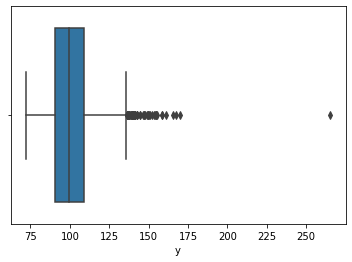

In [15]:
sns.boxplot(trainset['y'])

"Outliers Elimination"

In [16]:
def outlier_elimination(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
l,u = outlier_elimination(trainset['y'])
trainset.drop(trainset[ (trainset['y'] > u) | (trainset['y'] < l) ].index , inplace=True)
print(trainset.shape)


(4159, 83)


In [17]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    pairs=[]
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th   index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                #pairs.append((df.columns.values[x],df.columns.values[y]))
    temp= df.copy()
    temp= temp.drop('ID',axis=1)
    corr_values=[]
    high_corr=[]
    cols = list(duplicateColumnNames)
    for i in range(len(cols)):
        for j in range(i+1,len(cols)):
            val=temp[cols[i]].corr(temp[cols[j]])
            if val>=0.90:
                corr_values.append(val)
                high_corr.append((cols[i],cols[j]))
    print("Number of correlated pairs:",len(high_corr))
    print("Correlation values:\n",corr_values)
    print("Feature pairs:\n",high_corr)
    
    return duplicateColumnNames ,high_corr
dup_col,hc_corr_pair=getDuplicateColumns(train_binary)


Number of correlated pairs: 1
Correlation values:
 [0.9999999999999999]
Feature pairs:
 [('X35', 'X37')]


In [18]:
for i in range(0,len(hc_corr_pair)):
    if hc_corr_pair[i][1] in train_binary.columns:
        train_binary=train_binary.drop(hc_corr_pair[i][1],axis=1)
        test_binary=test_binary.drop(hc_corr_pair[i][1],axis=1)
        trainset=trainset.drop(hc_corr_pair[i][1],axis=1)
        testset=testset.drop(hc_corr_pair[i][1],axis=1)
        
print(train_binary.shape,test_binary.shape,'\n',trainset.shape,testset.shape)

(4209, 73) (4209, 73) 
 (4159, 82) (4209, 81)


In [19]:
#Do we need to check for interactions?

In [20]:
# Removing target from train set
feat=np.array(trainset.columns)
feat=np.delete(feat,1)
X_train=trainset.loc[:,feat]
X_train
y_tr=trainset.loc[:,['y']]
y_tr

print(X_train.shape,y_tr.shape,type(y_tr))

(4159, 81) (4159, 1) <class 'pandas.core.frame.DataFrame'>


In [21]:
ytrmax=float(y_tr.max())
ytrmin=float(y_tr.min())
type(ytrmax)
ytrmax

135.53

In [22]:
#Normalizing train target
y_train=((y_tr-y_tr.min())/(y_tr.max()-y_tr.min()))
y_train.describe()


,y
count,4159.000000
mean,0.441283
std,0.180324
min,0.000000
25%,0.294387
50%,0.423526
75%,0.578839
max,1.000000


In [23]:
print(y_tr.min(),y_tr.max())

y    72.11
dtype: float64 y    135.53
dtype: float64


In [24]:
X_test=testset.copy()

# Label Encoding



In [25]:
Cat_features=X_train.select_dtypes(include=['object']).copy()
LE=LabelEncoder()
for col in Cat_features:
    LE.fit(X_train[col])
    X_train[col]=pd.Categorical(LE.transform(X_train[col]))
    LE.fit(X_test[col])
    X_test[col]=pd.Categorical(LE.transform(X_test[col]))
print(X_train.shape,X_test.shape)

(4159, 81) (4209, 81)


In [26]:
X_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X14,...,X350,X351,X354,X355,X358,X362,X363,X374,X375,X377
0,0,32,23,16,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,1
1,6,32,21,18,4,3,28,11,14,0,...,0,0,0,0,0,0,1,0,1,0
2,7,20,24,33,2,3,27,9,23,0,...,1,0,1,0,1,0,1,0,0,0
3,9,20,21,33,5,3,27,11,4,0,...,1,0,0,0,1,0,1,0,0,0
4,13,20,23,33,5,3,12,3,13,0,...,1,0,0,0,1,0,1,0,0,0


In [27]:
X_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X14,...,X350,X351,X354,X355,X358,X362,X363,X374,X375,X377
0,1,21,23,34,5,3,26,0,22,0,...,1,0,0,0,1,0,1,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,0,0,0,1,0,0,0,1
2,3,21,23,17,5,3,0,9,9,1,...,1,0,0,0,0,0,1,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,1,0,0,0,1,0,1,0,0,0
4,5,45,20,17,2,3,30,8,12,1,...,1,1,0,0,1,0,1,0,1,0


# Dimensionality Reduction using PCA

In [28]:
#STANDARIZATION
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)

In [29]:
X_train_scaled.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X14,...,X350,X351,X354,X355,X358,X362,X363,X374,X375,X377
0,-1.726650,0.162640,1.392066,-0.026613,-1.679588,0.029112,1.290465,0.752997,0.341610,-0.864569,...,-0.717333,-0.650646,1.995204,-0.781915,-0.862024,-1.041997,-1.746327,-0.543355,-0.683388,1.477192
1,-1.724189,0.162640,1.157878,0.157402,0.615412,0.029112,1.775030,1.438275,0.341610,-0.864569,...,-0.717333,-0.650646,-0.501202,-0.781915,-0.862024,-1.041997,0.572630,-0.543355,1.463297,-0.676960
2,-1.723779,-0.713172,1.509160,1.537521,-0.532088,0.029112,1.653889,0.752997,1.620544,-0.864569,...,1.394053,-0.650646,1.995204,-0.781915,1.160061,-1.041997,0.572630,-0.543355,-0.683388,-0.676960
3,-1.722959,-0.713172,1.157878,1.537521,1.189162,0.029112,1.653889,1.438275,-1.079429,-0.864569,...,1.394053,-0.650646,-0.501202,-0.781915,1.160061,-1.041997,0.572630,-0.543355,-0.683388,-0.676960
4,-1.721319,-0.713172,1.392066,1.537521,1.189162,0.029112,-0.163231,-1.302834,0.199506,-0.864569,...,1.394053,-0.650646,-0.501202,-0.781915,1.160061,-1.041997,0.572630,-0.543355,-0.683388,-0.676960


In [30]:
#DIMENSION REDUCTION
pca=PCA()
X_train_pca=pd.DataFrame(pca.fit_transform(X_train_scaled),index=X_train_scaled.index, columns=X_train_scaled.columns)
X_test_pca=pd.DataFrame(pca.transform(X_test_scaled),index=X_test_scaled.index, columns=X_test_scaled.columns)
X_train_pca.head()


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X14,...,X350,X351,X354,X355,X358,X362,X363,X374,X375,X377
0,1.979633,0.101121,3.666994,-0.311622,3.677675,0.874481,-0.417713,-1.943171,0.903206,-1.656762,...,0.053882,-0.064696,0.765714,-5.469000e-15,1.003156e-15,-1.245676e-15,-4.933974e-16,2.190186e-16,1.462055e-16,4.581877e-17
1,-0.511750,2.159374,2.231042,0.768399,1.604320,1.175893,-1.725615,1.932902,1.306531,-0.161049,...,0.659194,-0.232019,-0.048743,8.741039e-15,-3.301071e-15,1.332884e-15,3.360322e-15,9.210453e-16,1.676712e-16,1.249246e-16
2,-1.623258,0.902714,2.803427,-2.787332,3.370990,-3.519718,1.774649,-0.377720,0.271861,3.862221,...,-0.057466,-0.032657,-0.034176,-1.149995e-14,-1.837383e-15,8.951358e-16,3.427767e-15,2.603773e-15,5.806566e-16,1.085578e-16
3,-0.774324,2.217569,1.256841,-3.749484,2.760951,-2.823042,-0.356035,1.052578,1.297875,2.134328,...,-0.025671,-0.036173,-0.080420,1.805038e-14,-1.405591e-15,-2.289605e-16,-7.522151e-16,-5.669711e-16,-6.633512e-16,2.698729e-15
4,-1.307627,2.176432,1.286466,-4.177785,2.858837,-3.167789,-0.526852,0.829972,0.674091,4.139201,...,-0.016581,-0.029630,-0.047196,-2.174988e-15,2.870457e-16,1.364399e-16,4.270626e-18,-4.690206e-17,3.281635e-17,-4.968810e-16


In [31]:
#TRAIN TEST SPLIT
X_train_split,X_test_split,y_train_split,y_test_split = tts(X_train_pca,y_train,test_size=0.2,random_state=46)

# Modeling using XGBoost Regressor

In [32]:
model = xgb.XGBRegressor(learning_rate=0.1,min_child_weight=2, subsample=0.8,colsample_bytree=0.8, max_depth=4,n_estimators=200,reg_alpha=0.5,validate_parameters=True)
#model.fit(X_train_split,y_train_split)
model.fit(X_train_split,y_train_split,eval_set=[(X_train_split, y_train_split), (X_test_split, y_test_split)], eval_metric='rmse',verbose=False)

[20:15:45] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.5,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
             validate_parameters=True, verbosity=None)

PREDICTION AND EVALUATION

In [33]:
y_preds_test_split_xgb = model.predict(X_test_split)
y_preds_train_split_xgb = model.predict(X_train_split)

In [34]:
xgbscore=model.score(X_train_split,y_train_split)
print('Training')
print('xgbscore',xgbscore)
print('r_2score',r2_score(y_train_split,y_preds_train_split_xgb))
print('Model evaluation')
print ('rmse' ,(np.sqrt(mse(y_test_split,y_preds_test_split_xgb))))
print('r2_score',r2_score(y_test_split,y_preds_test_split_xgb))

evals_result = model.evals_result()
print('\n Evals_result\n', evals_result)

Training
xgbscore 0.8591926279688586
r_2score 0.8591926279688586
Model evaluation
rmse 0.11178244789815975
r2_score 0.5973482720455779

 Evals_result
 {'validation_0': {'rmse': [0.180324, 0.17241, 0.165172, 0.159269, 0.153581, 0.148308, 0.14373, 0.139491, 0.135921, 0.132766, 0.130293, 0.127897, 0.125705, 0.123814, 0.121967, 0.120264, 0.119001, 0.117711, 0.116458, 0.115317, 0.114312, 0.113257, 0.112363, 0.111483, 0.110724, 0.110063, 0.109303, 0.108648, 0.107999, 0.107343, 0.106632, 0.106105, 0.10564, 0.105103, 0.104642, 0.10413, 0.10365, 0.103268, 0.102934, 0.102341, 0.101856, 0.101551, 0.10102, 0.100591, 0.100237, 0.099844, 0.09942, 0.098996, 0.098718, 0.098439, 0.0981, 0.097745, 0.097439, 0.09724, 0.096818, 0.0966, 0.096384, 0.096073, 0.095752, 0.095557, 0.095374, 0.095084, 0.094757, 0.09441, 0.094155, 0.093866, 0.093595, 0.093311, 0.093027, 0.092686, 0.092291, 0.0921, 0.091954, 0.091758, 0.091441, 0.091209, 0.090943, 0.090674, 0.090466, 0.090197, 0.089829, 0.089629, 0.089393, 0.08917

# MODELING Using Core XGBoost

In [35]:
D_train_split = xgb.DMatrix(X_train_split,label=y_train_split)
D_test_split = xgb.DMatrix(X_test_split,label=y_test_split)
D_test = xgb.DMatrix(X_test_pca) #? we dont have targets

In [36]:
params={'eta':0.25,
       'subsample': 1,
       'colsample_bytree': 0.3,
       'gamma': 1,
       'max_depth': 4,
       'n_estimators': 200,
      'min_child_weight': 2,
      'objective':'reg:squarederror',
      'eval_metric': 'rmse',
      'base_score': 100,
      'alpha': 0.6,
        'n_trees':20}
def xgb_r2_score(preds,dtrain):
    labels=dtrain.get_label()
    return 'r2', r2_score(labels,preds)
watchlist=[(D_train_split,'train_split'), (D_test_split,'test_split')]
modelB = xgb.train(params, D_train_split, 5000 , watchlist, early_stopping_rounds=200, 
                       feval=xgb_r2_score, maximize=True, verbose_eval=20)


[20:15:54] WARNING: /workspace/src/learner.cc:328: 
Parameters: { n_estimators, n_trees } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train_split-rmse:74.67472	test_split-rmse:74.68846	train_split-r2:-169800.36029	test_split-r2:-179757.45935
Multiple eval metrics have been passed: 'test_split-r2' will be used for early stopping.

Will train until test_split-r2 hasn't improved in 200 rounds.
[20]	train_split-rmse:0.28110	test_split-rmse:0.29175	train_split-r2:-1.40613	test_split-r2:-1.74294
[40]	train_split-rmse:0.12663	test_split-rmse:0.12470	train_split-r2:0.51173	test_split-r2:0.49894
[60]	train_split-rmse:0.12662	test_split-rmse:0.12463	train_split-r2:0.51176	test_split-r2:0.49951
[80]	train_split-rmse:0.12371	test_split-rmse:0.12177	train_split-r2:0.53400	test_split-


PREDICTIONS AND EVALUATION

In [37]:
y_preds_test_s = modelB.predict(D_test_split, ntree_limit=modelB.best_ntree_limit)
y_preds_train_s = modelB.predict(D_train_split, ntree_limit=modelB.best_ntree_limit)

print('Training')

print('r_2score',r2_score(y_train_split,y_preds_train_s))
print('Model evaluation')
print ('rmse' ,(np.sqrt(mse(y_test_split,y_preds_test_s))))
print('r2_score',r2_score(y_test_split,y_preds_test_s))


Training
r_2score 0.5400438737551889
Model evaluation
rmse 0.1211129510030865
r2_score 0.5273240478754011


In [38]:
y_preds=modelB.predict(D_test,ntree_limit=modelB.best_ntree_limit)
y_preds

array([0.13313293, 0.40143585, 0.31513214, ..., 0.33772278, 0.5901871 ,
       0.32561493], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

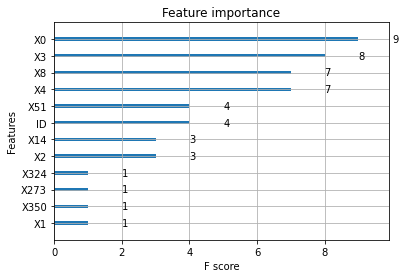

In [39]:
xgb.plot_importance(modelB)

In [40]:
Y_pred_final=np.ones(y_preds.shape)
for i in range(0,len(y_preds)):
    Y_pred_final[i]=(((y_preds[i])*(ytrmax-ytrmin))+ytrmin)
    
Y_pred_final

array([ 80.55329071,  97.56906174,  92.09568039, ...,  93.5283786 ,
       109.53966415,  92.76049881])

In [41]:
Y_pred_final_df=pd.DataFrame(Y_pred_final,columns=['Predicted time for test'])
Y_pred_final_df

,Predicted time for test
0,80.553291
1,97.569062
2,92.095680
3,82.070180
4,110.112550
...,...
4204,105.588011
4205,92.798240
4206,93.528379
4207,109.539664


### NOTE ON MODELS

The model created through XGBoostRegressor had slightly better results with 
Training
xgbscore 0.8591926279688586
r_2score 0.8591926279688586
Model evaluation
rmse 0.11178244789815975
r2_score 0.5973482720455779

While the model created through core XGBoost didn't deliever best results with
Training
r_2score 0.5400438737551889
Model evaluation
rmse 0.1211129510030865
r2_score 0.5273240478754011

However I choose core XGBoost for final prediction results since it was asked in the project.

Thank you for evaluating this project.